In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [11]:
df=pd.read_csv("Fraud.csv")

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
df.info

<bound method DataFrame.info of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1

In [14]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [15]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [16]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [17]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [18]:
df.shape

(6362620, 11)

In [23]:
round((df["isFraud"].value_counts()[1]/df.shape[0])* 100,2)

np.float64(0.13)

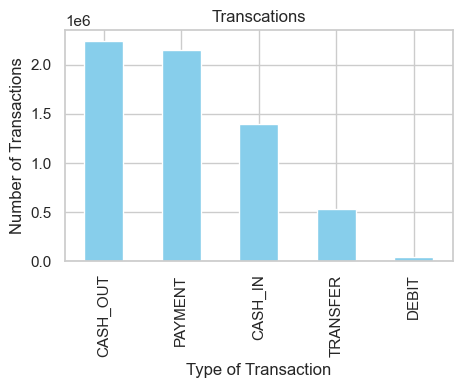

In [28]:
df['type'].value_counts().plot(kind='bar', title="Transcations", figsize=(5, 3), color='skyblue')
plt.xlabel("Type of Transaction")
plt.ylabel("Number of Transactions")
plt.show()

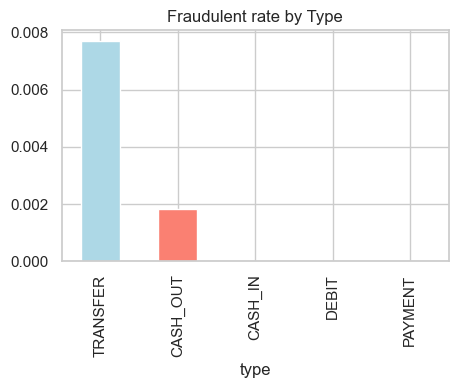

In [29]:
fraud_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_type.plot(kind='bar', stacked=True, figsize=(5,3), color=['lightblue', 'salmon'])
plt.title("Fraudulent rate by Type") 
plt.show()

In [31]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

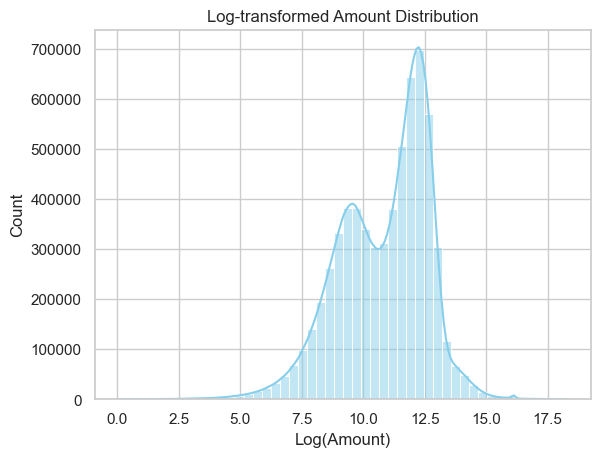

In [32]:
sns.histplot(np.log1p(df['amount']), bins=50, kde=True,color='skyblue')
plt.title("Log-transformed Amount Distribution")
plt.xlabel("Log(Amount)")   
plt.show()

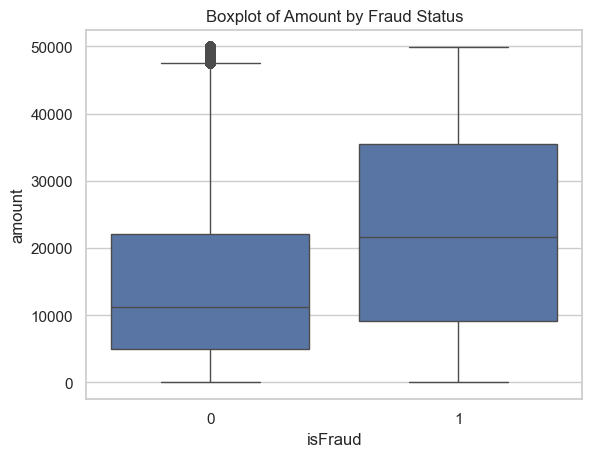

In [36]:
sns.boxplot(data=df[df['amount'] < 50000], x="isFraud",y="amount")
plt.title("Boxplot of Amount by Fraud Status")
plt.show()

In [ ]:
df['balance_orig_diff'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_dest_diff'] = df['newbalanceDest'] - df['oldbalanceDest']
display(df.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_orig_diff,balance_dest_diff
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0


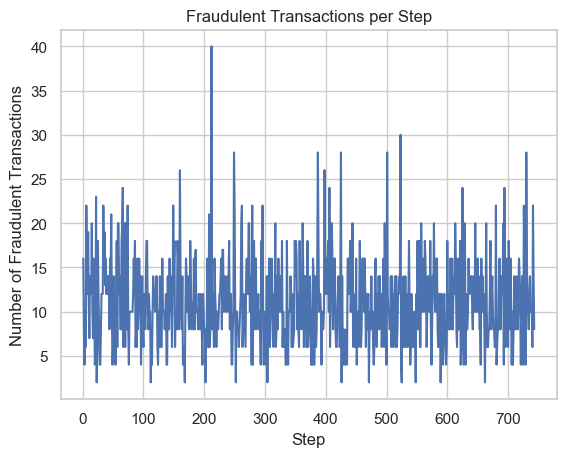

In [38]:
fraudper_step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()
plt.plot(fraudper_step.index, fraudper_step.values, label='Fraudulent per step')
plt.xlabel('Step')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions per Step')
plt.grid(True)
plt.show()

In [39]:
df.drop(columns='step',inplace=True)

In [40]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_orig_diff,balance_dest_diff
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0


In [41]:
top_senders=df["nameOrig"].value_counts().head(10)
top_receivers=df["nameDest"].value_counts().head(10)

In [42]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [43]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [45]:
fraud_users = df[df['isFraud'] == 1]["nameOrig"].value_counts().head(10)

In [46]:
fraud_users

nameOrig
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
C1364127192    1
Name: count, dtype: int64

In [47]:
fraud_types=df[df['type'].isin(['CASH_OUT', 'TRANSFER'])]

In [50]:
fraud_types.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_orig_diff,balance_dest_diff
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,-181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,-181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,-15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,-705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,-10835.0,2712905.89


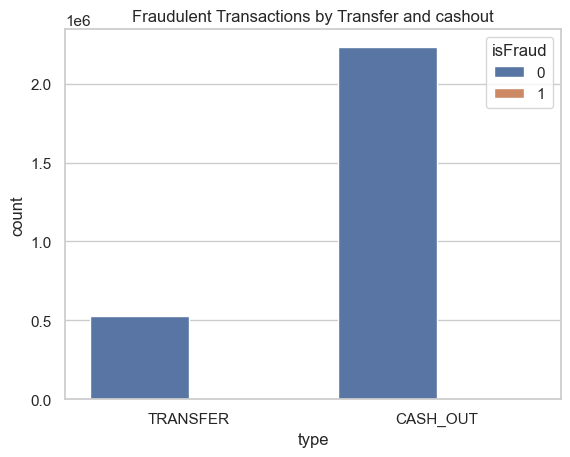

In [51]:
sns.countplot(data=fraud_types, x='type', hue='isFraud')
plt.title("Fraudulent Transactions by Transfer and cashout")
plt.show()

In [52]:
corr=df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()    

In [53]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


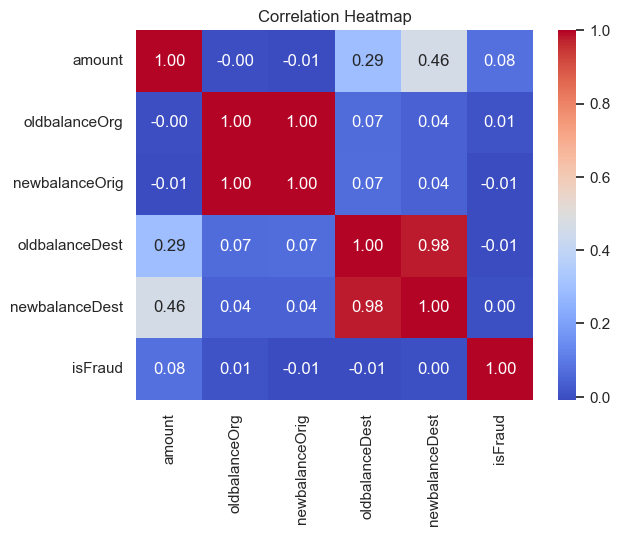

In [54]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [56]:
ZeroAfter_transfer=df[(df["oldbalanceOrg"]>0) & 
                      (df["newbalanceOrig"]==0) & 
                      (df["type"].isin(["TRANSFER", "CASH_OUT"]))
                      ]

In [57]:
len(ZeroAfter_transfer)

1188074

In [58]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [59]:
%pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 2.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/8.7 MB 2.4 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.7 MB 2.3 MB/s eta 0:00:04
   -------- ------------------------------- 1.8/8.7 MB 2.3 MB/s eta 0:00:04
   --------- ------------------------------ 2.1/8.7 MB 2.2 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.7 MB 2.1 MB/s eta 0:00:03
   ------------- -------------------------- 2.9/8.7 MB 2.0 MB/s eta 0:00:03
   -------------- ------------------------- 3.1/8.7 MB 1.9 MB/s eta 0:00:03
   ---------------- ----------------------- 3.7/8.7 MB 1.9 MB/s eta 0:00:03
   ------------------ --------------------- 3.9/8.7 MB 1.9 MB/s eta 0:00:03
   ------------------- -------------------- 4.2/8.7 MB 1.9 MB/s eta 0:00:03
   --------------------- ------------------ 4.7/8.7 MB 1.9 MB/s eta 0:00:03
   ----------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [61]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_orig_diff,balance_dest_diff
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0


In [62]:
df_model=df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [64]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balance_orig_diff,balance_dest_diff
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,-9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,-1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,-181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,-181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,-11668.14,0.0


In [65]:
categorical=["type"]
numeric=["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [ ]:
y=df_model["isFraud"]
X=df_model.drop("isFraud", axis=1)

In [67]:
X_train_, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [69]:
preprocessor= ColumnTransformer(
    transformers= [
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [73]:
pipeline=Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [74]:
pipeline.fit(X_train_, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [76]:
y_pred=pipeline.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [78]:
confusion_matrix(y_test, y_pred)

array([[1803623,  102699],
       [    145,    2319]])

In [79]:
pipeline.score(X_test, y_test)

0.946120728043898

In [80]:
import joblib
joblib.dump(pipeline, 'fraud_detection_pipeline.pkl')

['fraud_detection_pipeline.pkl']

In [81]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_orig_diff,balance_dest_diff
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0
